In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

In [12]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict (x1, x2, x3, w1, w2, w3, b):
    result = w1*x1 + w2*x2 + w3*x3 + b
    return result

In [13]:
def predict (x1, x2, x3, w1, w2, w3, b):
    result = w1*x1 + w2*x2 + w3*x3 + b
    return result

def compute_loss(y_hat, y):
    return (y_hat - y)**2

In [14]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

In [15]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr*dl_db
    return b

In [16]:
def compute_loss_mse(y, y_hat):
    return (y - y_hat)**2

def compute_loss_mae(y,y_hat):
    return abs(y-y_hat)

def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)

            # Accumulate loss
            loss_total += loss

            # Compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradient w1, w2, w3, b
            # Update parameters
            

            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3 
            db_total += dl_db

        # (After processing N samples) - Update parameters
        # your code here **************
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)
        # Logging
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses

In [17]:
X , y = prepare_data('advertising.csv')

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

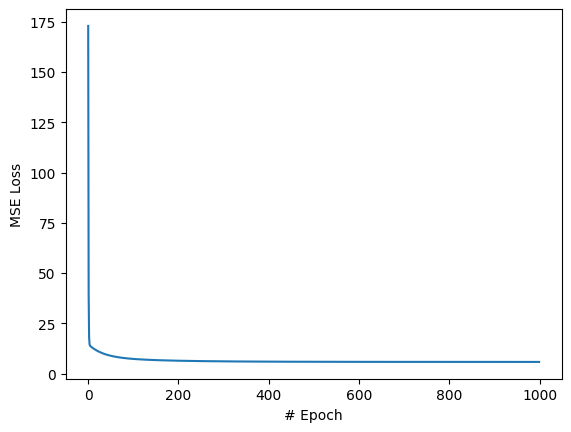

In [18]:
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("# Epoch")
plt.ylabel("MSE Loss")
plt.show()

In [20]:
print(w1,w2,w3, b, losses)

0.06710990754044266 0.15756173831487585 0.029619799386084403 0.015537523797089711 [172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877